# Nonlinear transfrom
## Question 1

In [1]:
def Nonlinear_transfrom(Q):
    x = ['1','x1','x2']
    for q in range(2,Q+1):
        for i in range(q,-1,-1):
            term = 'x1^'+str(i)+'x2^'+str(q-i)
            x.append(term)
    return x

In [2]:
z = Nonlinear_transfrom(10)
print len(z)-1

65


# Bias and Variance
## Question 2  
the average of logistic regression models cannot be represented by  one logistic regression model 

# Overfitting
## Question 3  
E_out - E_in is always getting larger?

## Question 4  
确定性误差和随机误差

# Regularization
## Question 6  
soft and hard order constraints not so understand

# Regularized Linear Regression
## Question 7

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import zero_one_loss

In [4]:
def addoneversusall(data):
    data['constant'] = 1
    for i in range(0,10):
        feature_name = str(i)
        data[feature_name]=data['digit'].apply(lambda x : 1 if x==i else -1)
    return data

In [5]:
def regularized_reg(X,y,a):
    n = (X.T*X).shape[0]
    return np.linalg.inv(X.T*X + a*np.identity(n))*X.T*y

In [6]:
def evaluate_Ein(data,features,labels,a):
    train_data = np.matrix(data[features])
    E_in = []
    for label in labels:
        true_label = np.matrix(data[label]).T
        W = regularized_reg(train_data,true_label,a)
        pred = train_data*W
        pred[pred>=0]=1
        pred[pred<0]=-1
        loss = zero_one_loss(pred,true_label) 
        print label,'E_in',loss
        E_in.append(loss)
    return E_in

In [7]:
train = pd.read_csv('features.train',sep='\s+',names=['digit','intensity','symmetry'])
train = addoneversusall(train)
features = ['intensity','symmetry','constant']
labels = ['5','6','7','8','9']
a = 1
evaluate_Ein(train,features,labels,a)

5 E_in 0.0762584007681
6 E_in 0.0910711836511
7 E_in 0.0884652311068
8 E_in 0.0743382252092
9 E_in 0.0883280757098


[0.076258400768070222,
 0.091071183651076693,
 0.088465231106844011,
 0.074338225209162001,
 0.088328075709779186]

## Question 8

In [8]:
def add_nonlinear_trans(train,Q):
    features = features = ['intensity','symmetry','constant']
    train['constant'] = 1
    for q in range(2,Q+1):
        for i in range(q,-1,-1):
            term = 'intensity^'+str(i)+'symmetry^'+str(q-i)
            features.append(term)
            train[term] = (train['intensity']**i)*(train['symmetry']**(q-i))
    return train,features

In [9]:
def evaluate_Eout(Train,Test,features,labels,a):
    train_data = np.matrix(Train[features])
    test_data = np.matrix(Test[features])
    E_out = []
    for label in labels:
        train_label = np.matrix(Train[label]).T
        test_label = np.matrix(Test[label]).T
        W = regularized_reg(train_data,train_label,a)
        pred = test_data*W
        pred[pred>=0]=1
        pred[pred<0]=-1
        loss = zero_one_loss(pred,test_label)
        print label,'E_out',loss
        E_out.append(loss)
    return E_out

In [10]:
train = pd.read_csv('features.train',sep='\s+',names=['digit','intensity','symmetry'])
test= pd.read_csv('features.test',sep='\s+',names=['digit','intensity','symmetry'])
train = addoneversusall(train)
test = addoneversusall(test)
train,features = add_nonlinear_trans(train,2)
test,features = add_nonlinear_trans(test,2)
labels = ['0','1','2','3','4']
a = 1
evaluate_Eout(train,test,features,labels,a)

0 E_out 0.106626806178
1 E_out 0.02192326856
2 E_out 0.0986547085202
3 E_out 0.0827105132038
4 E_out 0.0996512207275


[0.10662680617837572,
 0.021923268560039899,
 0.098654708520179324,
 0.082710513203786751,
 0.099651220727453915]

## Question 9

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
train = pd.read_csv('features.train',sep='\s+',names=['digit','intensity','symmetry'])
test = pd.read_csv('features.test',sep='\s+',names=['digit','intensity','symmetry'])
# not using transform
print 'not use transform'
train = pd.read_csv('features.train',sep='\s+',names=['digit','intensity','symmetry'])
train = addoneversusall(train)
test = addoneversusall(test)
features = ['intensity','symmetry','constant']
labels = ['0','1','2','3','4','5','6','7','8','9']
a = 1
E_in = evaluate_Ein(train,features,labels,a)
E_out = evaluate_Eout(train,test,features,labels,a)

not use transform
0 E_in 0.109312851461
1 E_in 0.0152242490742
2 E_in 0.100260595254
3 E_in 0.0902482512687
4 E_in 0.0894253188863
5 E_in 0.0762584007681
6 E_in 0.0910711836511
7 E_in 0.0884652311068
8 E_in 0.0743382252092
9 E_in 0.0883280757098
0 E_out 0.11509715994
1 E_out 0.0224215246637
2 E_out 0.0986547085202
3 E_out 0.0827105132038
4 E_out 0.0996512207275
5 E_out 0.079720976582
6 E_out 0.0847035376183
7 E_out 0.0732436472347
8 E_out 0.0827105132038
9 E_out 0.0881913303438


In [13]:
print 'use transform'
train = pd.read_csv('features.train',sep='  ',names=['digit','intensity','symmetry'])
test = pd.read_csv('features.test',sep='  ',names=['digit','intensity','symmetry'])
train = addoneversusall(train)
test = addoneversusall(test)
train,features = add_nonlinear_trans(train,2)
test,features = add_nonlinear_trans(test,2)
labels = ['0','1','2','3','4','5','6','7','8','9']
a = 1
E_in_trans = evaluate_Ein(train,features,labels,a)
E_out_trans = evaluate_Eout(train,test,features,labels,a)

use transform
0 E_in 0.10231792621
1 E_in 0.0123439857358
2 E_in 0.100260595254
3 E_in 0.0902482512687
4 E_in 0.0894253188863
5 E_in 0.0762584007681
6 E_in 0.0910711836511
7 E_in 0.0884652311068
8 E_in 0.0743382252092
9 E_in 0.0883280757098
0 E_out 0.106626806178
1 E_out 0.02192326856
2 E_out 0.0986547085202
3 E_out 0.0827105132038
4 E_out 0.0996512207275
5 E_out 0.0792227204783
6 E_out 0.0847035376183
7 E_out 0.0732436472347
8 E_out 0.0827105132038
9 E_out 0.0881913303438


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


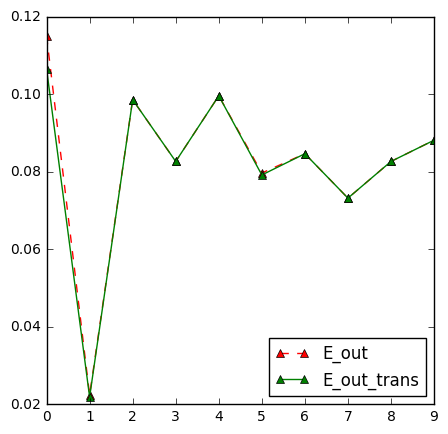

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#Ein = ax.plot(range(0,10),E_in,'bs--',label = 'E_in')
Eout = ax.plot(range(0,10),E_out,'r^--',label = 'E_out')
#Ein_trans = ax.plot(range(0,10),E_in_trans,'cs-',label = 'E_in_trans')
Eout_trans = ax.plot(range(0,10),E_out_trans,'g^-',label = 'E_out_trans')
plt.legend(loc='lower right')

In [15]:
E_out_trans[5] - E_out[5] < E_out[5]*0.05

True

## Question 10

In [16]:
train = pd.read_csv('features.train',sep='\s+',names=['digit','intensity','symmetry'])
test = pd.read_csv('features.test',sep='\s+',names=['digit','intensity','symmetry'])

In [17]:
train['label']=-1
train['label'][train['digit']==1]=1
train = train[(train.digit==1)|(train.digit==5)]
test['label']=-1
test['label'][test['digit']==1]=1
test = test[(test.digit==1)|(test.digit==5)]
train,features= add_nonlinear_trans(train,2)
test,features = add_nonlinear_trans(test,2)
labels = ['label']

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
E_in = []
E_out = []
r = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01]
for a in r:
    E_in.append(evaluate_Ein(train,features,labels,a))
    E_out.append(evaluate_Eout(train,test,features,labels,a))

label E_in 0.00512491992313
label E_out 0.0259433962264
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00512491992313
label E_out 0.0283018867925
label E_in 0.00448430493274
label E_out 0.0283018867925


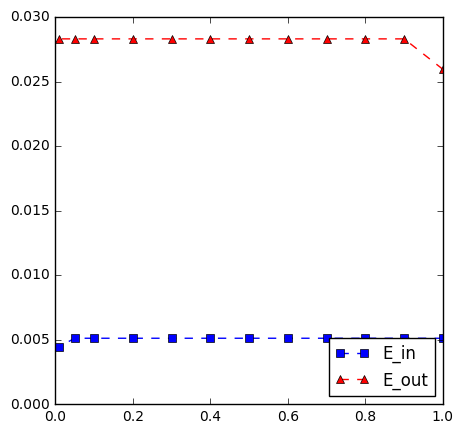

In [19]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
Ein = ax.plot(r,E_in,'bs--',label = 'E_in')
Eout = ax.plot(r,E_out,'r^--',label = 'E_out')
plt.legend(loc='lower right')

# Support Vector Machines
## Question 11

In [20]:
x1 = [1,0,-1]
x2 = [0,1,-1]
x3 = [0,-1,-1]
x4 = [-1,0,1]
x5 = [0,2,1]
x6 = [0,-2,1]
x7 = [-2,0,1]

In [21]:
data = np.matrix([x1,x2,x3,x4,x5,x6,x7])

In [22]:
data = pd.DataFrame(data,columns=['x1','x2','y'])

In [23]:
data['z1'] = data['x2']**2 -  2*data['x1'] -1
data['z2'] = data['x1']**2 - 2*data['x2'] +1

In [24]:
z1 = data.z1.values

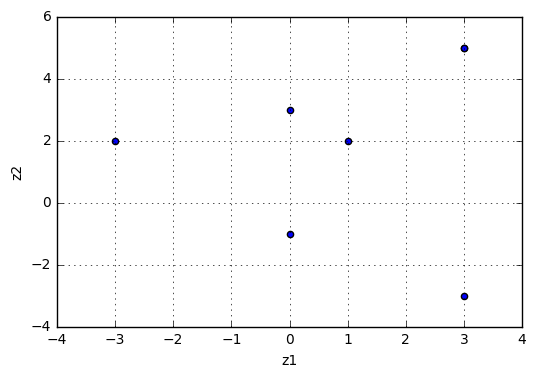

In [25]:
data.plot(x='z1',y='z2',kind = 'scatter',grid=True)

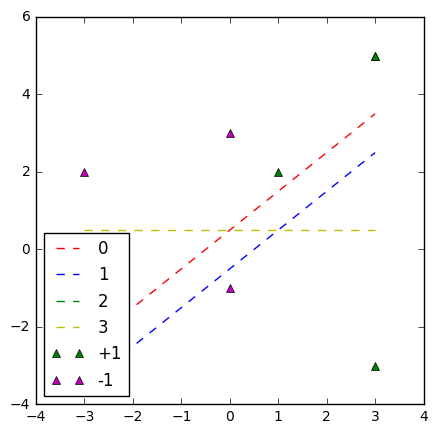

In [26]:
lines = [(-1,1,-0.5),(1,-1,-0.5),(1,0,-0.5),(0,1,-0.5)]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
color = ["r--",'b--','g--','y--']
for index,line in enumerate(lines):
    w1,w2,b = line
    z2 = (-b-w1*z1)/w2
    line = ax.plot(z1,z2,color[index],label = str(index))
ax.plot(data.z1[data.y==1].values,data.z2[data.y==1].values,'g^',label = '+1')
ax.plot(data.z1[data.y==-1].values,data.z2[data.y==-1].values,'m^',label = '-1')
plt.xlim(-4,4)
plt.ylim(-4,6)
plt.legend(loc='lower left')

## Question 12

In [27]:
from sklearn.svm import SVC

In [28]:
svm_clf = SVC(C=1.0,kernel='poly',degree=2,gamma=1,coef0=1)

In [29]:
X = np.matrix(data[['x1','x2']])
y = np.matrix(data['y']).T

In [30]:
svm_clf.fit(X,y)

D:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
svm_clf.n_support_.sum()

5

# Radial Basis Functions
## Question 13 - 18

# Bayesian Priors
## Question 19  
$ p(h=f|D) = \frac{P(h=f)*p(D|h=f)}{P(D)} $

# Aggregation
## Question 20  

$ E_{out}(g)=[\frac{g_1(x) + g_2(x)}{2} - f(x)]^2 = \frac{1}{4}(g_1(x)+g_2(x))^2 - f(x)(g_1(x)+g_2(x)) + f(x)^2$

$ \frac{E_{out}(g_1)+E_{out}(g_2)}{2} = \frac{1}{2}[(g_1(x)-f(x)^2 + (g_2(x)-f(x))^2] = \frac{1}{2}[g_1(x)^2 - 2g_1(x)f(x)+f(x)^2+g_2(x)^2-2g_2(x)f(x)+f(x)^2] = \frac{1}{2}(g_1(x)+g_2(x))^2 - f(x)(g_1(x)+g_2(x)) + f(x)^2$